<img src='./img/image.jpg' vspace='8px' hspace='8px'/>
<h1><center>Análise dos xingamentos e mortes dos filmes do Tarantino</center></h1>
<h2>Introdução</h2>

Quentin Tarantino é um diretor, roteirista, produtor e ator, porém de todas essas profissões ficou mais conhecido pela sua direção e roteiro que tem como característica uma forma não convencial de contar o enredo, trazendo a não linearidade, diversos diálogos marcantes e o uso da violência gráfica. Quentin é considerado um dos mais importantes cineastas da sua geração sendo aclamado tanto pelos seus fãs, como pela crítica.

<h2>Dataset</h2>

O dataset contempla os xingamentos, registrando a palavra e o minuto do filme que foi dita, e as mortes, registrando apenas o minuto do filme em que ocorreu a morte, dos filmes: <i>Jackie Brown, Reservoir Dogs, Pulp Fiction, Kill Bill: Vol. 1, Kill Bill Vol. 2, Inglorious Basterds, Django Unchained.</i><br>

<h2>Verificando o dataset</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.patches import Ellipse
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()
sns.set_style('white')

In [2]:
df = pd.read_csv('tarantino.csv')
df.head()

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


Como há xingamentos que estão no plural no dataset, será necessário alterar as palavras para o singular para não interferir na análise, com isso ficamos com 41 tipos de palavrões.

In [3]:
df['word'].replace({'dicks':'dick', 'fucked':'fuck', 'fucking':'fuck', 'fucks':'fuck', 'motherfuckers':'motherfucker',
                   'assholes':'asshole', 'asses':'ass', 'fuckup':'fuck', 'fucker':'fuck', 'shitty':'shit', 'damned':'damn',
                   'bitches':'bitch', 'fuckers':'fuck', 'gooks':'gook', 'motherfucking':'motherfucker', 'cunts':'cunt',
                   'japs':'jap', 'shitless':'shit', 'shitting':'shit', 'shittiest':'shit'}, inplace=True)
df['word'].unique().shape[0]

41

<h2>Análise dos dados</h2>

<h3>Quantidade de mortes e xingamentos</h3>

Violência nos filmes é uma das características que deixou Tarantino famoso, e ela é trazida tanto pelo uso de palavrões e mortes, apenas da quantidade de xingamentos ser muito maior que o número de mortes (8 vezes maior) o número é bem alto para apenas 7 filmes, dando a seguinte média:
<ul>
    <li>Palavrões: 243.43</li>
    <li>Mortes: 27.14</li>
</ul>

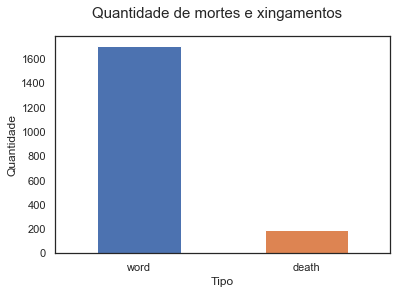

In [4]:
df.groupby(df['type']).count()['movie'].sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=0)
plt.suptitle('Quantidade de mortes e xingamentos', fontsize=15)
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.show()

<h3>Quais são os palavrões mais comuns</h3>

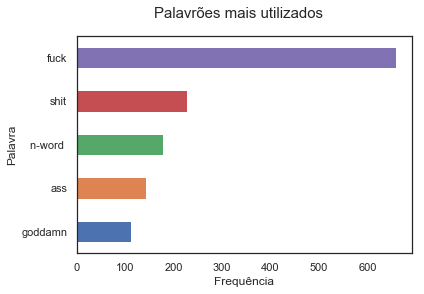

In [5]:
words = df.groupby('word').count().sort_values('movie',ascending=False)['movie'].head()
words.sort_values(ascending=True).plot(kind='barh')
plt.suptitle('Palavrões mais utilizados', fontsize=15)
plt.ylabel('Palavra')
plt.xlabel('Frequência')
plt.show()

<h3>Será que todos os filmes possuem as mesma quantidade de xingamentos?</h3>

Aparentemente não, há 4 filmes que há bem mais palavrões que os outros 3, <i> Kill Bill: Vol. 2, Inglorious Basterds e Kill Bill: Vol. 1</i>, que são mais ação que os demais.

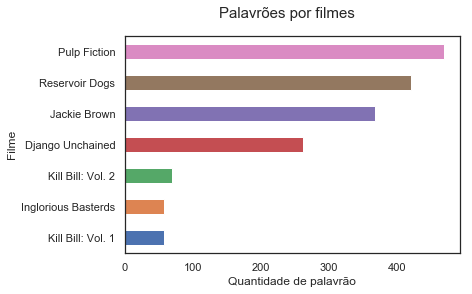

In [6]:
df[df['type']=='word'].groupby('movie').count()['type'].sort_values(ascending=True).plot(kind='barh')
plt.suptitle('Palavrões por filmes', fontsize=15)
plt.xlabel('Quantidade de palavrão')
plt.ylabel('Filme')
plt.show()

<h3>Quais são os xingamentos mais utilizados em cada filme?</h3>

Separamos as palavras mais utilizadas em cada filme, e verificamos um comportamento parecido para todos os filmes, que é o uso preferencial de apenas um xingamento. Também há dois padrões de filmes, onde um usa preferencialmente a palavra <i>f#ck</i> e outro utiliza a <i>n-word</i>, Jackie Brown e Django Unchained, que são filmes de <i> Blaxploitation</i>.

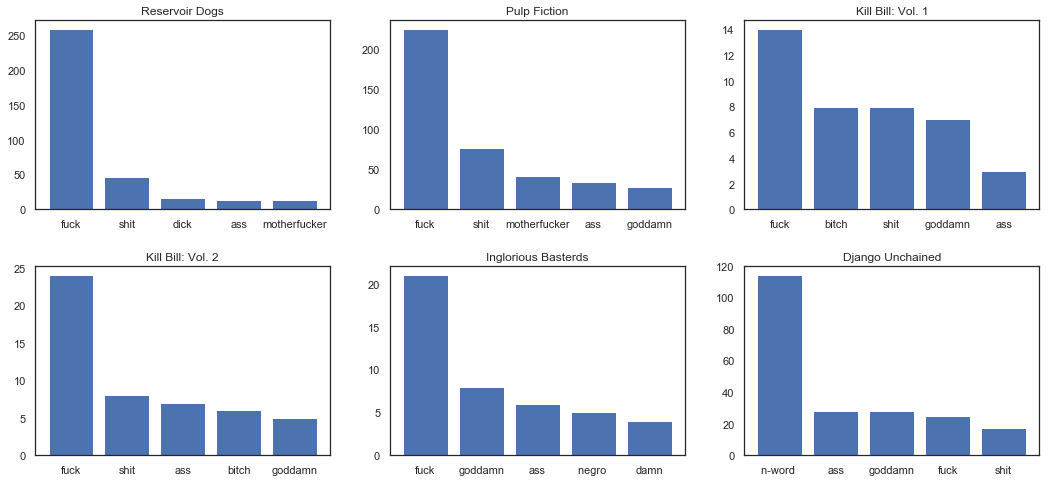

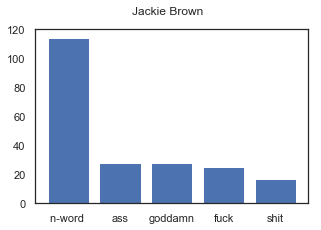

In [7]:
movies = ['Reservoir Dogs', 'Pulp Fiction', 'Kill Bill: Vol. 1', 'Kill Bill: Vol. 2', 'Inglorious Basterds', 
          'Django Unchained',]
index = 0
fig, axs = plt.subplots(2,3,figsize=(18,8))
fig.subplots_adjust(wspace=0.2, hspace=0.3)
for i in range(2):
    for j in range(3):
        wrd_mv = df[df['movie']==movies[index]].groupby('word').count().sort_values(by='movie', ascending=False).head(5)
        wrd_mv.reset_index(inplace=True)
        axs[i, j].bar(x=wrd_mv['word'], height=wrd_mv['movie'])
        axs[i, j].set_title(movies[index])
        index += 1
django = df[df['movie']=='Django Unchained'].groupby('word').count().sort_values(by='movie', ascending=False).head(5)
django.reset_index(inplace=True)
plt.figure(figsize=(4.9,3.2))
plt.bar(django['word'],django['movie'])
plt.suptitle('Jackie Brown')
plt.show()

<h3>Qual o filme há uma frequência maior de palavrões?</h3>

Já sabemos que o <i>Pulp Fiction</i> é o filme com mais palavrões, mas ele realmente é o filme mais boca suja?<br>
Para isso temos que verificar a quantidade de xingamentos em relação a duração do filme, para vermos com que frequência há um palavrão no script. Com isso descobrimos que apesar do <i>Pulp Fiction</i> ter mais palavrões ele também é o segundo filme mais longo do <i>Tarantino</i>, porém <i>Reservoir Dogs</i> que é o segundo em quantidade é o filme mais curto, obtendo uma frequência de <i>4,25</i> xingamentos por minuto.

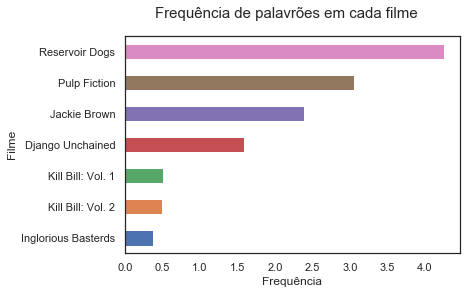

In [8]:
duracao =pd.Series({'Django Unchained':165, 'Inglorious Basterds':153, 'Jackie Brown':154, 'Kill Bill: Vol. 1':111,
           'Kill Bill: Vol. 2':137, 'Pulp Fiction':154, 'Reservoir Dogs':99})
wrd_count = df[df['type']=='word'].groupby('movie').count()['type']
wrd_freq = round(wrd_count/duracao,2)
wrd_freq.sort_values(ascending=True).plot(kind='barh')
plt.suptitle('Frequência de palavrões em cada filme',fontsize=15)
plt.xlabel('Frequência')
plt.ylabel('Filme')
plt.show()

<h3>Qual filme há mais mortes?</h3>

Para destacar a violência contida em seus filmes Tarantino complementa a falta de palavrões nos filmes <i>Kill Bill: Vol. 1 e Inglorius Basterds</i> com bastante mortes, sendo os filmes com mais falecimentos. Entretanto esta pergunta era a mais previsível, pois a fatídica cena da <i>Beatrix Kiddo vs Crazy 88</i> há uma grande quantidade de mortes, por isso <i>Kill Bill: Vol. 1</i> ficou em primeiro com 63 mortes.

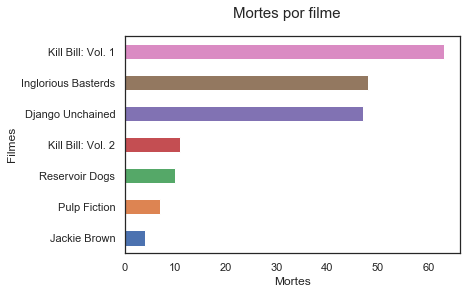

In [9]:
df[df['type']=='death'].groupby('movie').count()['type'].sort_values(ascending=True).plot(kind='barh')
plt.suptitle('Mortes por filme', fontsize=15)
plt.xlabel('Mortes')
plt.ylabel('Filmes')
plt.show()

Analisando a linha do tempo de mortes em <i>Kill Bill: Vol. 1</i>, podemos ver que há apenas algumas mortes até o minuto 76, onde se inicia a cena Beatrix Kiddo vs Crazy 88, após isso há uma crescente na mortes chegando no máximo 16 mortes em um minuto.

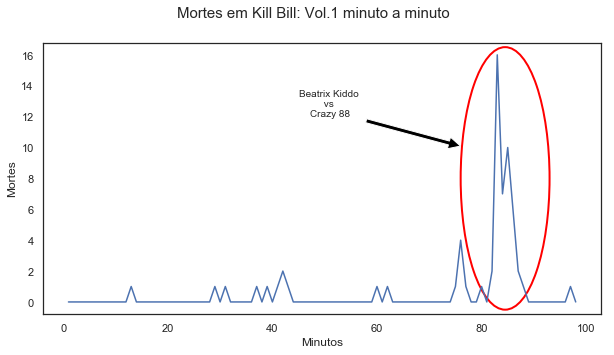

In [10]:
death_kb1 = df[df['movie']=='Kill Bill: Vol. 1']
death_kb1['minutes_in'] = death_kb1['minutes_in'].astype(int)
death_kb1 = death_kb1[death_kb1['type']=='death'].groupby('minutes_in').count()['movie']
no_kill = []
for minuto in range(1,duracao['Reservoir Dogs']):
    if minuto not in death_kb1:
        no_kill.append(minuto)
serie = pd.Series(np.zeros(len(no_kill)).astype(int), index=no_kill)
fig = death_kb1.append(serie).sort_index().plot(figsize=(10,5))
ellipse = Ellipse((84.5, 8), 17, 17, 0)
ellipse.set_fill(False)
ellipse.set_edgecolor('red')
ellipse.set_lw(2)
fig.add_patch(ellipse)
fig.annotate('Beatrix Kiddo\n         vs\n    Crazy 88', xy=(77,10), xytext=(45,12),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.suptitle('Mortes em Kill Bill: Vol.1 minuto a minuto', fontsize=15)
plt.xlabel('Minutos')
plt.ylabel('Mortes')
plt.show()

<h3>Qual o filme menos violento?</h3>

Kill Bill: Vol. 2, filme que termina a história Kill Bill e que é o roteiro mais autoral de Tarantino, pois foca mais no encerramento e no passado de Beatrix Kiddo, trazendo um ritmo menos frenético comparado ao volume anterior e com isso um filme menos violento e mais introspectivo.

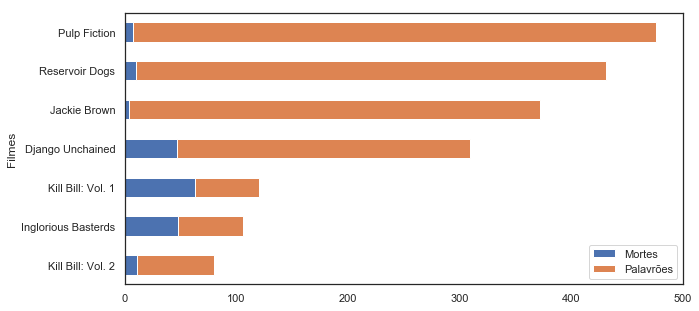

In [11]:
index = df[df['type']=='death'].groupby('movie').count()['type'].index
mortes = list(df[df['type']=='death'].groupby('movie').count()['type'])
xinga = list(df[df['type']=='word'].groupby('movie').count()['type'])
menos_vio = pd.DataFrame({'Mortes':mortes, 'Palavrões':xinga})
menos_vio.index = index
menos_vio = menos_vio.reindex(index = ['Kill Bill: Vol. 2', 'Inglorious Basterds', 'Kill Bill: Vol. 1', 'Django Unchained',
                                       'Jackie Brown', 'Reservoir Dogs', 'Pulp Fiction'])
menos_vio.plot(kind='barh', stacked=True, figsize=(10,5))
plt.ylabel('Filmes')
plt.show()

<h2>Conclusão</h2>

Este foi o meu estudo sobre a violência dos filmes de Tarantino, que acabou virando uma característica dele e umas das causas que o deixou famoso, apesar de apreciar mais da escrita de seu roteiro. Nesta análise podemos ver uma tendência dos filmes dele, porém isso não é verdadeiramente ruim, pois nos enredos podemos verificar a versatilidade deste diretor, dirigindo filmes de diferentes contextos e até a duologia Kill Bill sendo aclamados pelo academia de cinema e os fãs.<br>
Infelizmente esse dataset não engloba o último filme, <i>Hateful Eight</i>, para termos mais dados, entretanto de uma coisa podemos ter certeza é que o filme tem muita violência, diálogos interessantes e é adorado pelo público. Ficamos na espera de ver <i>Once Upon A Time In... Hollywood</i>, que sai este ano.<br>
Espero que goste e aproveite esta análise.